# NBA Analysis

In [132]:
import pandas as pd
import numpy as np
%matplotlib inline

In [199]:
nba = pd.read_csv("nba_all_elo.csv")

In [137]:
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)
nba.tail()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.41,1704.39,60.31,GSW,Warriors,103,1790.96,1809.98,H,L,0.55,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.98,1813.63,68.01,CLE,Cavaliers,91,1704.39,1700.74,H,W,0.77,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN
126313,63157,201506170CLE,NBA,1,2015,6/16/2015,103,1,GSW,Warriors,105,1813.63,1822.29,68.52,CLE,Cavaliers,97,1700.74,1692.09,A,W,0.52,NaN


In [138]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

In [139]:
nba.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00
mean,31579.00,0.5,1988.20,43.53,0.06,102.73,1495.24,1495.24,41.71,102.73,1495.24,1495.24,0.50
std,18231.93,0.5,17.58,25.38,0.24,14.81,112.14,112.46,10.63,14.81,112.14,112.46,0.22
min,1.00,0.0,1947.00,1.00,0.00,0.00,1091.64,1085.77,10.15,0.00,1091.64,1085.77,0.02
25%,15790.00,0.0,1975.00,22.00,0.00,93.00,1417.24,1416.99,34.10,93.00,1417.24,1416.99,0.33
50%,31579.00,0.5,1990.00,43.00,0.00,103.00,1500.95,1500.95,42.11,103.00,1500.95,1500.95,0.50
75%,47368.00,1.0,2003.00,65.00,0.00,112.00,1576.06,1576.29,49.64,112.00,1576.06,1576.29,0.67
max,63157.00,1.0,2015.00,108.00,1.00,186.00,1853.10,1853.10,71.11,186.00,1853.10,1853.10,0.98


In [140]:
nba.describe(include=np.object)

,game_id,lg_id,date_game,team_id,fran_id,opp_id,opp_fran,game_location,game_result,notes
count,126314,126314,126314,126314,126314,126314,126314,126314,126314,5424
unique,63157,2,12426,104,53,104,53,3,2,231
top,198310280DET,NBA,4/16/2014,BOS,Lakers,BOS,Lakers,A,W,at New York NY
freq,2,118016,30,5997,6024,5997,6024,63138,63157,440


In [141]:
nba["team_id"].value_counts()

BOS    5997
NYK    5769
LAL    5078
DET    4985
PHI    4533
       ... 
INJ      60
TRH      60
PIT      60
DTF      60
SDS      11
Name: team_id, Length: 104, dtype: int64

In [142]:
nba["fran_id"].value_counts()

Lakers          6024
Celtics         5997
Knicks          5769
Warriors        5657
Pistons         5650
Sixers          5644
Hawks           5572
Kings           5475
Wizards         4582
Spurs           4309
Bulls           4307
Pacers          4227
Thunder         4178
Rockets         4154
Nuggets         4120
Nets            4106
Suns            4080
Bucks           4034
Trailblazers    3870
Cavaliers       3810
Clippers        3733
Jazz            3555
Mavericks       3013
Heat            2371
Pelicans        2254
Magic           2207
Timberwolves    2131
Grizzlies       1657
Raptors         1634
Hornets          894
Colonels         846
Squires          799
Spirits          777
Stars            756
Sounds           697
Baltimore        467
Floridians       440
Condors          430
Capitols         291
Olympians        282
Sails            274
Stags            260
Bombers          249
Steamrollers     168
Packers           72
Redskins          65
Rebels            63
Waterloo     

In [143]:
nba.loc[nba["fran_id"] == "Lakers", "team_id"].value_counts()

LAL    5078
MNL     946
Name: team_id, dtype: int64

In [144]:
nba.loc[nba["team_id"] == "MNL", "date_game"].min()

'1/1/1949'

In [145]:
nba.loc[nba["team_id"] == "MNL", "date_game"].max()

'4/9/1959'

In [146]:
nba.loc[nba["team_id"] == "MNL", "date_game"].agg(("min", "max"))

min    1/1/1949
max    4/9/1959
Name: date_game, dtype: object

In [147]:
nba.loc[nba["team_id"] == "BOS", "pts"].sum()

626484

In [148]:
nba.index

RangeIndex(start=0, stop=126314, step=1)

In [149]:
nba.axes

[RangeIndex(start=0, stop=126314, step=1),
 Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
        'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
        'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
        'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'],
       dtype='object')]

In [150]:
"points" in nba.keys()

False

In [151]:
nba.keys()

Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
       'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
       'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
       'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'],
      dtype='object')

In [152]:
"pts" in nba.keys()

True

In [153]:
nba.iloc[-2]

gameorder               63157
game_id          201506170CLE
lg_id                     NBA
_iscopy                     0
year_id                  2015
date_game           6/16/2015
seasongame                102
is_playoffs                 1
team_id                   CLE
fran_id             Cavaliers
pts                        97
elo_i                 1.7e+03
elo_n                 1.7e+03
win_equiv                  59
opp_id                    GSW
opp_fran             Warriors
opp_pts                   105
opp_elo_i             1.8e+03
opp_elo_n             1.8e+03
game_location               H
game_result                 L
forecast                 0.48
notes                     NaN
Name: 126312, dtype: object

In [154]:
nba.iloc[-1]

gameorder               63157
game_id          201506170CLE
lg_id                     NBA
_iscopy                     1
year_id                  2015
date_game           6/16/2015
seasongame                103
is_playoffs                 1
team_id                   GSW
fran_id              Warriors
pts                       105
elo_i                 1.8e+03
elo_n                 1.8e+03
win_equiv                  69
opp_id                    CLE
opp_fran            Cavaliers
opp_pts                    97
opp_elo_i             1.7e+03
opp_elo_n             1.7e+03
game_location               A
game_result                 W
forecast                 0.52
notes                     NaN
Name: 126313, dtype: object

In [155]:
nba.loc[5555: 5559, ["fran_id" , "pts"]]

,fran_id,pts
5555,Pistons,83
5556,Celtics,95
5557,Knicks,74
5558,Kings,81
5559,Sixers,86


In [156]:
current_decade = nba[nba["year_id"] > 2010]
current_decade.shape

(12658, 23)

In [157]:
games_with_notes = nba[nba["notes"].notnull()]
games_with_notes.shape

(5424, 23)

In [158]:
ers = nba[nba["fran_id"].str.endswith("ers")]
ers.shape

(27797, 23)

In [159]:
nba[
    (nba["_iscopy"] == 0) &
    (nba["pts"] > 100) &
    (nba["opp_pts"] > 100) &
    (nba["team_id"] == "BLB")
]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
1726,864,194902260BLB,NBA,0,1949,2/26/1949,53,0,BLB,Baltimore,114,1421.94,1419.43,38.56,MNL,Lakers,115,1637.99,1640.49,H,L,0.34,NaN
4890,2446,195301100BLB,NBA,0,1953,1/10/1953,32,0,BLB,Baltimore,126,1328.67,1356.65,25.80,BOS,Celtics,105,1591.14,1563.17,H,W,0.28,NaN
4909,2455,195301140BLB,NBA,0,1953,1/14/1953,34,0,BLB,Baltimore,104,1349.83,1346.36,24.88,MNL,Lakers,112,1665.44,1668.91,H,L,0.22,NaN
5208,2605,195303110BLB,NBA,0,1953,3/11/1953,66,0,BLB,Baltimore,107,1284.52,1282.24,19.58,NYK,Knicks,113,1649.15,1651.44,H,L,0.18,at Boston MA
5825,2913,195402220BLB,NBA,0,1954,2/22/1954,60,0,BLB,Baltimore,110,1303.75,1301.97,20.74,BOS,Celtics,111,1591.49,1593.27,H,L,0.25,at Worcester MA


In [160]:
nba[
    (nba["year_id"] == 1992) &
    (nba["team_id"].str.startswith("LA")) &
    (nba["_iscopy"] == 0) &
    (nba["notes"].notnull())
]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
68901,34451,199205030LAC,NBA,0,1992,5/3/1992,86,1,LAC,Clippers,115,1546.90,1556.0,47.89,UTA,Jazz,107,1647.51,1638.41,H,W,0.50,"at Anaheim, CA (Anaheim Convention Center)"
68903,34452,199205030LAL,NBA,0,1992,5/3/1992,86,1,LAL,Lakers,76,1489.65,1474.4,39.40,POR,Trailblazers,102,1655.12,1670.37,H,L,0.41,"at Las Vegas, NV"


In [161]:
points = nba["pts"]
type(points)

pandas.core.series.Series

In [162]:
points.sum()

12976235

In [163]:
nba.groupby("fran_id", sort=False)["pts"].sum()

fran_id
Huskies           3995
Knicks          582497
Stags            20398
Falcons           3797
Capitols         22387
Celtics         626484
Steamrollers     12372
Ironmen           3674
Bombers          17793
Rebels            4474
Warriors        591224
Baltimore        37219
Jets              4482
Pistons         572758
Lakers          637444
Kings           569245
Hawks           567261
Denver            4818
Olympians        22864
Redskins          5372
Waterloo          4921
Packers           6193
Sixers          585891
Wizards         474809
Bulls           437269
Thunder         437735
Squires          91127
Stars            84940
Rockets         432504
Colonels         94435
Pacers          438288
Nuggets         445780
Spurs           453822
Spirits          85874
Sounds           75582
Floridians       49568
Nets            417809
Condors          49642
Bucks           418326
Suns            437486
Clippers        380523
Cavaliers       380416
Trailblazers    402695
Sai

In [164]:
nba[
    (nba["fran_id"] == "Spurs") &
    (nba["year_id"] > 2010)
].groupby(["year_id", "game_result"])["team_id"].count()

year_id  game_result
2011     L              25
         W              63
2012     L              20
         W              60
2013     L              30
         W              73
2014     L              27
         W              78
2015     L              31
         W              58
Name: team_id, dtype: int64

In [165]:
nba[
    (nba["fran_id"] == "Warriors") &
    (nba["year_id"] == 2015)
].groupby(["is_playoffs", "game_result"])["team_id"].count()

is_playoffs  game_result
0            L              15
             W              67
1            L               5
             W              16
Name: team_id, dtype: int64

In [166]:
df = nba.copy()
df.shape

(126314, 23)

In [167]:
df["difference"] = df.pts - df.opp_pts
df.shape

(126314, 24)

In [168]:
df[df["difference"] == df["difference"].max()]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,difference
67232,33617,199112170CLE,NBA,0,1992,12/17/1991,21,0,CLE,Cavaliers,148,1510.35,1527.71,44.97,MIA,Heat,80,1417.86,1400.5,H,W,0.75,NaN,68


In [169]:
rename_df = df.rename(
    columns={"game_result": "result", "game_location": "location"}
)
rename_df.info

<bound method DataFrame.info of         gameorder       game_id lg_id  _iscopy  year_id  date_game  \
0               1  194611010TRH   NBA        0     1947  11/1/1946   
1               1  194611010TRH   NBA        1     1947  11/1/1946   
2               2  194611020CHS   NBA        0     1947  11/2/1946   
3               2  194611020CHS   NBA        1     1947  11/2/1946   
4               3  194611020DTF   NBA        0     1947  11/2/1946   
...           ...           ...   ...      ...      ...        ...   
126309      63155  201506110CLE   NBA        0     2015  6/11/2015   
126310      63156  201506140GSW   NBA        0     2015  6/14/2015   
126311      63156  201506140GSW   NBA        1     2015  6/14/2015   
126312      63157  201506170CLE   NBA        0     2015  6/16/2015   
126313      63157  201506170CLE   NBA        1     2015  6/16/2015   

        seasongame  is_playoffs team_id    fran_id  pts    elo_i    elo_n  \
0                1            0     TRH    Huskies

In [170]:
df.info

<bound method DataFrame.info of         gameorder       game_id lg_id  _iscopy  year_id  date_game  \
0               1  194611010TRH   NBA        0     1947  11/1/1946   
1               1  194611010TRH   NBA        1     1947  11/1/1946   
2               2  194611020CHS   NBA        0     1947  11/2/1946   
3               2  194611020CHS   NBA        1     1947  11/2/1946   
4               3  194611020DTF   NBA        0     1947  11/2/1946   
...           ...           ...   ...      ...      ...        ...   
126309      63155  201506110CLE   NBA        0     2015  6/11/2015   
126310      63156  201506140GSW   NBA        0     2015  6/14/2015   
126311      63156  201506140GSW   NBA        1     2015  6/14/2015   
126312      63157  201506170CLE   NBA        0     2015  6/16/2015   
126313      63157  201506170CLE   NBA        1     2015  6/16/2015   

        seasongame  is_playoffs team_id    fran_id  pts    elo_i    elo_n  \
0                1            0     TRH    Huskies

In [171]:
df.shape

(126314, 24)

In [172]:
elo_columns = ["elo_i", "elo_n", "opp_elo_i", "opp_elo_n"]
df.drop(elo_columns, inplace = True, axis = 1)

In [173]:
df.shape

(126314, 20)

In [207]:
df.drop("opp_elo_n", inplace = True, axis = 1)

KeyError: "['opp_elo_n'] not found in axis"

In [208]:
df.shape

(126314, 20)

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  category      
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  datetime64[ns]
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  win_equiv      126314 non-null  float64       
 12  opp_id         126314 non-null  object        
 13  opp_fran       126314 non-null  object        
 14  opp_pts        126314 non-null  int64         
 15  

In [210]:
df["date_game"] = pd.to_datetime(df["date_game"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  category      
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  datetime64[ns]
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  win_equiv      126314 non-null  float64       
 12  opp_id         126314 non-null  object        
 13  opp_fran       126314 non-null  object        
 14  opp_pts        126314 non-null  int64         
 15  

In [211]:
df["game_location"].nunique()

3

In [212]:
df["game_location"].value_counts()

H    63138
A    63138
N       38
Name: game_location, dtype: int64

In [213]:
df["game_location"] = pd.Categorical(df["game_location"])
df["game_location"].dtype

CategoricalDtype(categories=['A', 'H', 'N'], ordered=False)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  category      
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  datetime64[ns]
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  win_equiv      126314 non-null  float64       
 12  opp_id         126314 non-null  object        
 13  opp_fran       126314 non-null  object        
 14  opp_pts        126314 non-null  int64         
 15  

In [215]:
df["game_result"].nunique()

2

In [216]:
df["game_result"] = pd.Categorical(df["game_result"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  category      
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  datetime64[ns]
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  win_equiv      126314 non-null  float64       
 12  opp_id         126314 non-null  object        
 13  opp_fran       126314 non-null  object        
 14  opp_pts        126314 non-null  int64         
 15  

In [184]:
df.info

<bound method DataFrame.info of         gameorder       game_id lg_id  _iscopy  year_id  date_game  \
0               1  194611010TRH   NBA        0     1947 1946-11-01   
1               1  194611010TRH   NBA        1     1947 1946-11-01   
2               2  194611020CHS   NBA        0     1947 1946-11-02   
3               2  194611020CHS   NBA        1     1947 1946-11-02   
4               3  194611020DTF   NBA        0     1947 1946-11-02   
...           ...           ...   ...      ...      ...        ...   
126309      63155  201506110CLE   NBA        0     2015 2015-06-11   
126310      63156  201506140GSW   NBA        0     2015 2015-06-14   
126311      63156  201506140GSW   NBA        1     2015 2015-06-14   
126312      63157  201506170CLE   NBA        0     2015 2015-06-16   
126313      63157  201506170CLE   NBA        1     2015 2015-06-16   

        seasongame  is_playoffs team_id    fran_id  pts  win_equiv opp_id  \
0                1            0     TRH    Huskies

In [185]:
df["_iscopy"].nunique()

2

In [186]:
df["_iscopy"] = pd.Categorical(df["_iscopy"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  category      
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  datetime64[ns]
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  win_equiv      126314 non-null  float64       
 12  opp_id         126314 non-null  object        
 13  opp_fran       126314 non-null  object        
 14  opp_pts        126314 non-null  int64         
 15  

In [187]:
df["game_result"].value_counts()

W    63157
L    63157
Name: game_result, dtype: int64

In [188]:
rows_without_missing_data = nba.dropna()
rows_without_missing_data.shape

(5424, 23)

In [189]:
data_without_missing_columns = nba.dropna(axis=1)
data_without_missing_columns.shape

(126314, 22)

In [190]:
data_without_default_notes = nba.copy()
data_without_default_notes["notes"].fillna(
    value="no notes at all",
    inplace = True
)
data_without_default_notes["notes"].describe()

count              126314
unique                232
top       no notes at all
freq               120890
Name: notes, dtype: object

In [191]:
data_without_default_notes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

In [192]:
nba.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00
mean,31579.00,0.5,1988.20,43.53,0.06,102.73,1495.24,1495.24,41.71,102.73,1495.24,1495.24,0.50
std,18231.93,0.5,17.58,25.38,0.24,14.81,112.14,112.46,10.63,14.81,112.14,112.46,0.22
min,1.00,0.0,1947.00,1.00,0.00,0.00,1091.64,1085.77,10.15,0.00,1091.64,1085.77,0.02
25%,15790.00,0.0,1975.00,22.00,0.00,93.00,1417.24,1416.99,34.10,93.00,1417.24,1416.99,0.33
50%,31579.00,0.5,1990.00,43.00,0.00,103.00,1500.95,1500.95,42.11,103.00,1500.95,1500.95,0.50
75%,47368.00,1.0,2003.00,65.00,0.00,112.00,1576.06,1576.29,49.64,112.00,1576.06,1576.29,0.67
max,63157.00,1.0,2015.00,108.00,1.00,186.00,1853.10,1853.10,71.11,186.00,1853.10,1853.10,0.98


In [193]:
#CHECK WHY THE MINIMUM VALUE FOR PTS IS 0
nba[nba["pts"] == 0]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
26684,13343,197210260VIR,ABA,1,1973,10/26/1972,7,0,DNR,Nuggets,0,1460.34,1457.45,40.41,VIR,Squires,2,1484.19,1487.08,A,L,0.33,at Richmond VA; forfeit to VIR


In [194]:
nba = nba.drop([0, 26684], inplace = True, axis=0)

In [203]:
nba[nba["pts"] == 0]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
26684,13343,197210260VIR,ABA,1,1973,10/26/1972,7,0,DNR,Nuggets,0,1460.34,1457.45,40.41,VIR,Squires,2,1484.19,1487.08,A,L,0.33,at Richmond VA; forfeit to VIR


In [217]:
nba[(nba["pts"] > nba["opp_pts"]) & (nba["game_result"] != 'W')].empty

True

In [218]:
 nba[(nba["pts"] < nba["opp_pts"]) & (nba["game_result"] != 'L')].empty

True

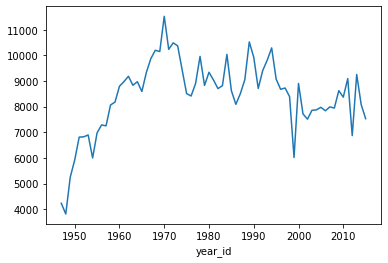

In [219]:
nba[nba["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum().plot()

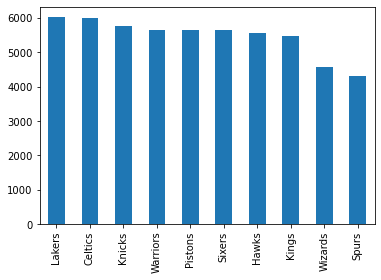

In [220]:
nba["fran_id"].value_counts().head(10).plot(kind="bar")

game_result
L    23
W    82
Name: fran_id, dtype: int64

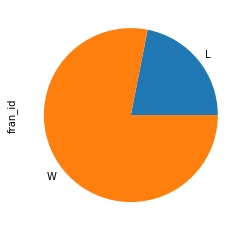

In [239]:
heat_record_2013 = nba[(nba["fran_id"] == "Heat") & (nba["year_id"] == 2013)]
heat_record_2013.groupby("game_result")["fran_id"].count().plot(kind="pie")
heat_record_2013.groupby("game_result")["fran_id"].count()